In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams["lines.linewidth"] = 1.5


In [19]:
data = pd.read_csv("../data/TD3BCWalker2d.csv")
data.columns


Index(['Step',
       'Prod-TD3-BC-alpha5-noLN-walker2d-medium-v2-634b08d9 - d4rl_normalized_score',
       'Prod-TD3-BC-alpha5-noLN-walker2d-medium-v2-634b08d9 - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-alpha5-noLN-walker2d-medium-v2-634b08d9 - d4rl_normalized_score__MAX',
       'Prod-TD3-BC-alpha5-walker2d-medium-v2-8c373562 - d4rl_normalized_score',
       'Prod-TD3-BC-alpha5-walker2d-medium-v2-8c373562 - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-alpha5-walker2d-medium-v2-8c373562 - d4rl_normalized_score__MAX',
       'Prod-TD3-BC-pretrainBC10k-alpha5-walker2d-medium-v2-114d8a5a - d4rl_normalized_score',
       'Prod-TD3-BC-pretrainBC10k-alpha5-walker2d-medium-v2-114d8a5a - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-pretrainBC10k-alpha5-walker2d-medium-v2-114d8a5a - d4rl_normalized_score__MAX',
       'Prod-TD3-BC-pretrainAC10k-alpha5--walker2d-medium-v2-2f4a305d - d4rl_normalized_score',
       'Prod-TD3-BC-pretrainAC10k-alpha5--walker2d-medium-v2-2f4a305d - d

In [20]:
data = data[data["Step"] < 300001]


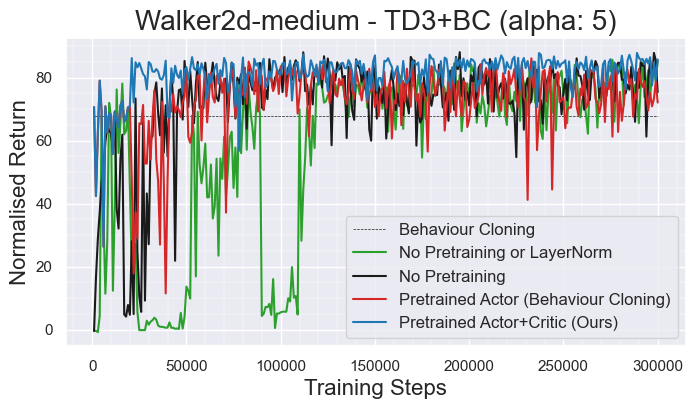

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(
    data["Step"],
    68.0 * np.ones_like(data["Step"]),
    label="Behaviour Cloning",
    linestyle="--",
    color="k",
    linewidth=0.5,
)
ax.plot(
    data["Step"],
    data["Prod-TD3-BC-alpha5-noLN-walker2d-medium-v2-634b08d9 - d4rl_normalized_score"],
    label="No Pretraining or LayerNorm",
    color="tab:green",
)
ax.plot(
    data["Step"],
    data["Prod-TD3-BC-alpha5-walker2d-medium-v2-8c373562 - d4rl_normalized_score"],
    label="No Pretraining",
    color="k",
)
ax.plot(
    data["Step"],
    data[
        "Prod-TD3-BC-pretrainBC10k-alpha5-walker2d-medium-v2-114d8a5a - d4rl_normalized_score"
    ],
    label="Pretrained Actor (Behaviour Cloning)",
    color="tab:red",
)
ax.plot(
    data["Step"],
    data[
        "Prod-TD3-BC-pretrainAC10k-alpha5--walker2d-medium-v2-2f4a305d - d4rl_normalized_score"
    ],
    label="Pretrained Actor+Critic (Ours)",
    color="tab:blue",
)
ax.legend(loc="lower right", fontsize=12)
ax.set_title("Walker2d-medium - TD3+BC (alpha: 5)", fontsize=20)
ax.set_xlabel("Training Steps", fontsize=16)
ax.set_ylabel("Normalised Return", fontsize=16)
ax.grid(visible=True, which="major")
ax.grid(visible=True, which="minor", linewidth=0.3)
ax.minorticks_on()
plt.show()
# fig.savefig("../plots/TD3BCWalker2d.pdf")
